In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, 
accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve, average_precision_score)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.svm import SVC

pd.set_option('display.max_rows', 500)

In [2]:
df_spray = pd.read_csv('spray.csv/spray.csv')
df_test = pd.read_csv('test.csv/test.csv')
df_train = pd.read_csv('train.csv/train.csv')
df_weather = pd.read_csv('weather.csv/weather.csv')

In [3]:
# Checking data size

print(f'The training dataset has {df_train.shape[0]} rows and {df_train.shape[1]} features.')
print(f'The test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} features.')
print(f'The spray dataset has {df_spray.shape[0]} rows and {df_spray.shape[1]} features.')
print(f'The weather dataset has {df_weather.shape[0]} rows and {df_weather.shape[1]} features.')

The training dataset has 10506 rows and 12 features.
The test dataset has 116293 rows and 11 features.
The spray dataset has 14835 rows and 4 features.
The weather dataset has 2944 rows and 22 features.


In [4]:
df_weather.columns = df_weather.columns.map(lambda col: col.lower().replace(' ','_'))
df_weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [5]:
df_spray.columns = df_spray.columns.map(lambda col: col.lower().replace(' ','_'))
df_spray.columns

Index(['date', 'time', 'latitude', 'longitude'], dtype='object')

In [6]:
df_test.columns = df_test.columns.map(lambda col: col.lower().replace(' ','_'))
df_test.columns

Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy'],
      dtype='object')

In [7]:
df_train.columns = df_train.columns.map(lambda col: col.lower().replace(' ','_'))
df_train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'],
      dtype='object')

In [8]:
df_spray

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423


In [9]:
df_spray.isnull().sum().sort_values(ascending=False).head(20)

time         584
date           0
latitude       0
longitude      0
dtype: int64

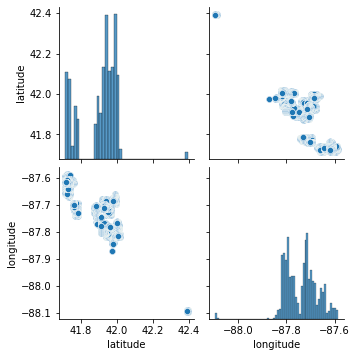

In [10]:
sns.pairplot(df_spray)

In [11]:
df_train.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [12]:
df_train.isnull().sum().sort_values(ascending=False).head(20)

date                      0
address                   0
species                   0
block                     0
street                    0
trap                      0
addressnumberandstreet    0
latitude                  0
longitude                 0
addressaccuracy           0
nummosquitos              0
wnvpresent                0
dtype: int64

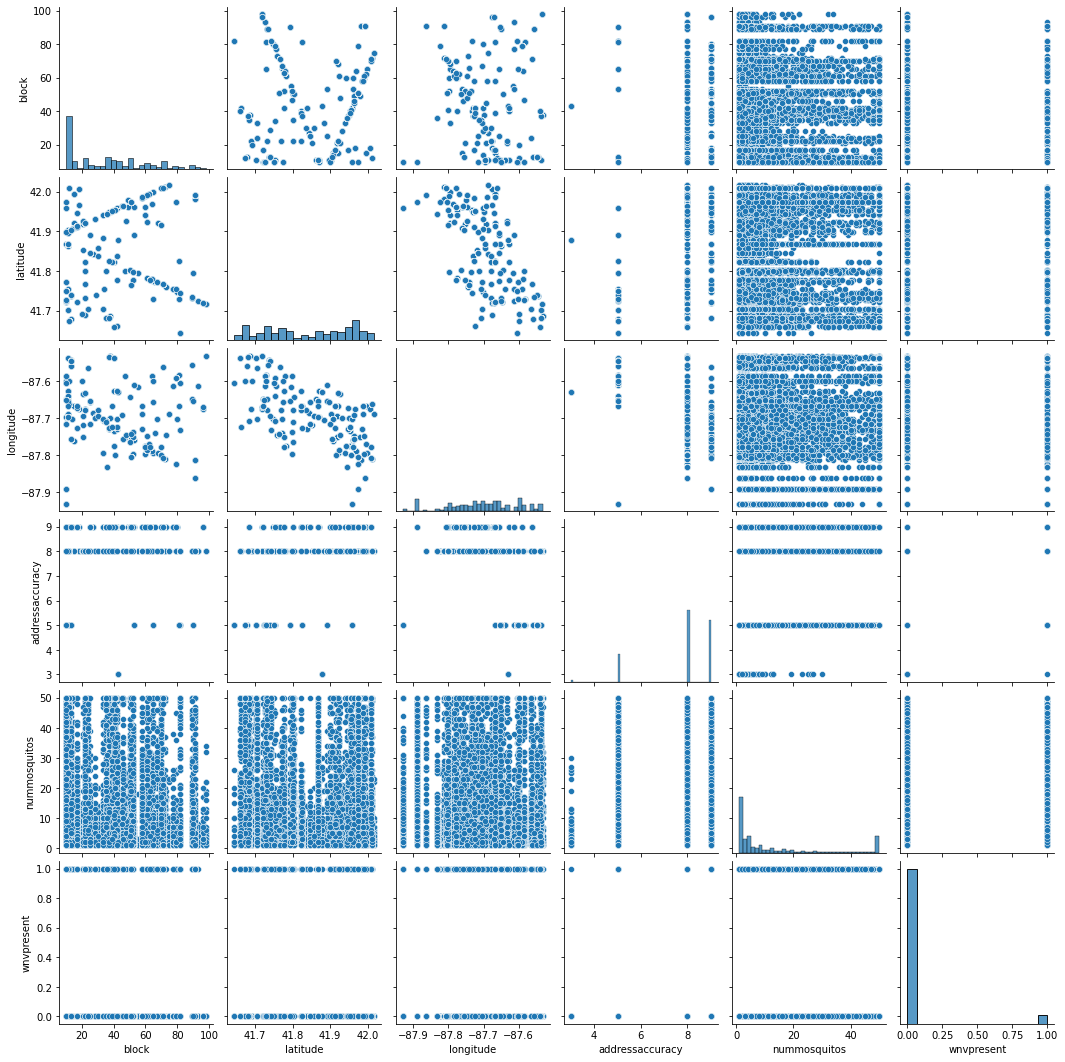

In [13]:
sns.pairplot(df_train)

In [14]:
df_weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [15]:
df_weather.isnull().sum().sort_values(ascending=False).head(20)

station        0
date           0
resultdir      0
resultspeed    0
sealevel       0
stnpressure    0
preciptotal    0
snowfall       0
water1         0
depth          0
codesum        0
sunset         0
sunrise        0
cool           0
heat           0
wetbulb        0
dewpoint       0
depart         0
tavg           0
tmin           0
dtype: int64

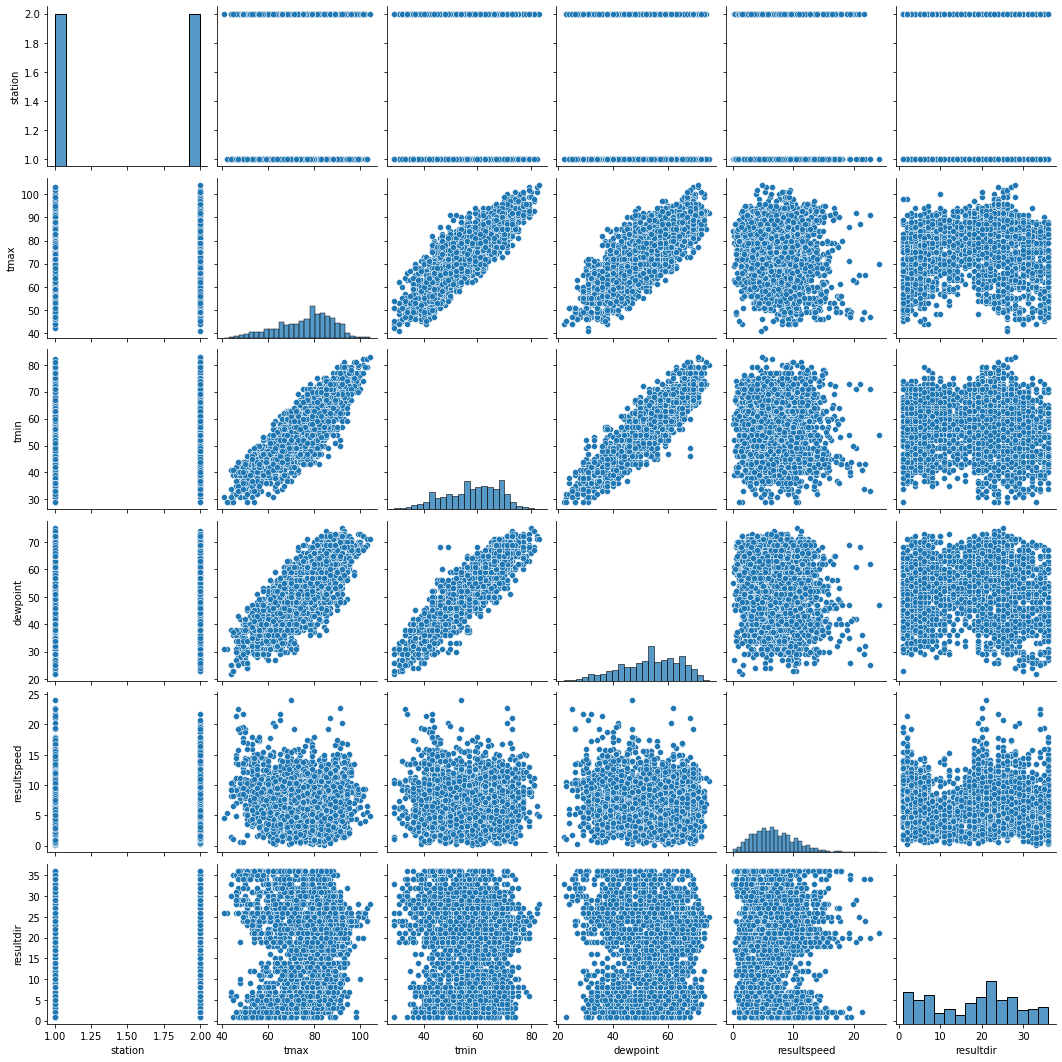

In [16]:
sns.pairplot(df_weather)

In [17]:
df_train_test = pd.concat([df_train, df_test], axis=0)

In [18]:
df_train_test.shape

(126799, 13)

In [19]:
df_train_test.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,id
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1.0,0.0,NaN
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1.0,0.0,NaN
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1.0,0.0,NaN
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1.0,0.0,NaN
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4.0,0.0,NaN


In [20]:
df_train_test.drop(['address','block','street','addressnumberandstreet','id','addressaccuracy'],axis=1,inplace=True)

In [21]:
df_train_test.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1.0,0.0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1.0,0.0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1.0,0.0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1.0,0.0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4.0,0.0


In [22]:
# Add Year, Month, Week and Day of Week features
df_train_test['date'] = pd.to_datetime(df_train_test['date'])
df_train_test['year'] = df_train_test['date'].apply(lambda x: x.year)
df_train_test['month'] = df_train_test['date'].apply(lambda x: x.month)
df_train_test['week'] = df_train_test['date'].apply(lambda x: x.week)
df_train_test['dayofweek'] = df_train_test['date'].apply(lambda x: x.dayofweek)

In [23]:
df_train_test.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,week,dayofweek
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1.0,0.0,2007,5,22,1
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1.0,0.0,2007,5,22,1
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1.0,0.0,2007,5,22,1
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1.0,0.0,2007,5,22,1
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4.0,0.0,2007,5,22,1


In [24]:
df_train_test.species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS', 'UNSPECIFIED CULEX'], dtype=object)

In [25]:
# Checking species value count
df_train_test['species'].value_counts()

CULEX PIPIENS/RESTUANS    20111
CULEX RESTUANS            17410
CULEX PIPIENS             17220
CULEX TERRITANS           14573
CULEX SALINARIUS          14441
CULEX TARSALIS            14353
CULEX ERRATICUS           14346
UNSPECIFIED CULEX         14345
Name: species, dtype: int64

In [26]:
df_train_test.trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [27]:
df_weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [28]:
df_weather.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [29]:
df_weather.isin(['M']).sum()[df_weather.isin(['M']).sum() > 0].sort_values(ascending=False)

water1         2944
depart         1472
depth          1472
snowfall       1472
tavg             11
heat             11
cool             11
sealevel          9
wetbulb           4
stnpressure       4
avgspeed          3
preciptotal       2
dtype: int64

In [30]:
df_weather.drop(['water1','depart','depth','snowfall','avgspeed','resultspeed','resultdir','sealevel','stnpressure','preciptotal','codesum','heat','cool'],axis=1,inplace=True)

In [31]:
# Add Year, Month, Week and Day of Week features
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather['year'] = df_weather['date'].apply(lambda x: x.year)
df_weather['month'] = df_weather['date'].apply(lambda x: x.month)
df_weather['week'] = df_weather['date'].apply(lambda x: x.week)
df_weather['dayofweek'] = df_weather['date'].apply(lambda x: x.dayofweek)

In [32]:
merged_df = pd.merge(df_weather, df_train_test, on=['date', 'year', 'week', 'month', 'dayofweek'])

In [33]:
# use heatmap to find the correlation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def heatmap(df):
    fix, ax = plt.subplots(figsize=(22,22))

    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(df.corr(), mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                     square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                     cbar_kws={"shrink": 0.8}, fmt='.1g',center=0)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    ax.set_title('Correlation Heatmap for Merged Data', fontsize=22);

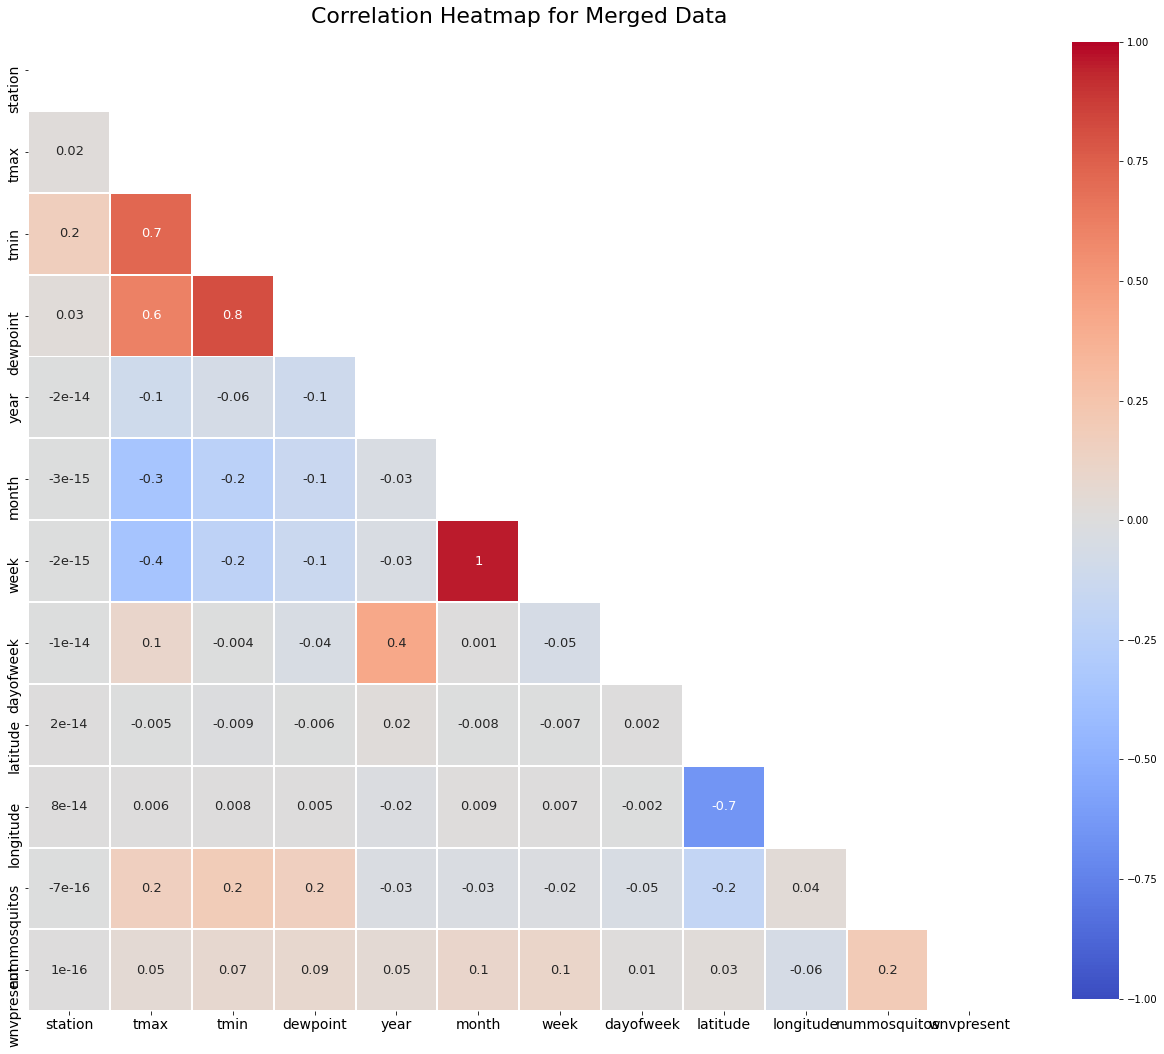

In [34]:
heatmap(merged_df)

In [35]:
df_train_new = df_train_test.iloc[:len(df_train), :]

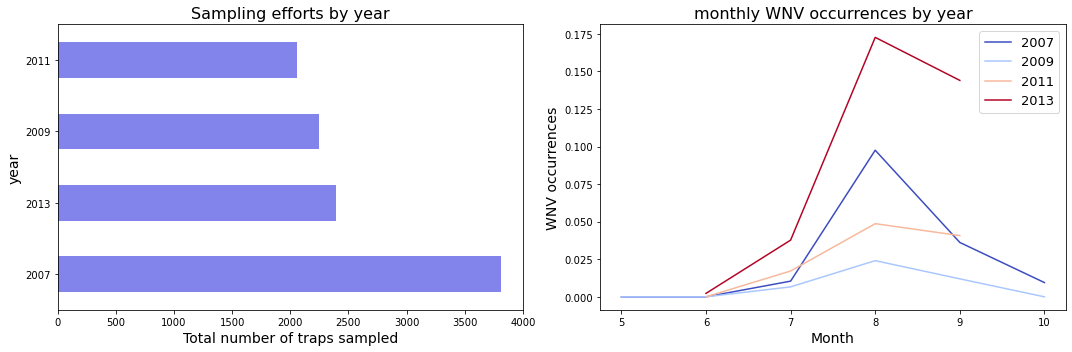

In [36]:
fig, ax = plt.subplots(ncols = 2, figsize=(15,5))

# plot sampling efforts by year
df_train_new['year'].value_counts().plot(kind = 'barh', ax = ax[0], color='#8383EC')
ax[0].set_title('Sampling efforts by year', fontsize=16)
ax[0].set_ylabel('year', fontsize=14)
ax[0].set_xlabel('Total number of traps sampled',fontsize=14)

sns.lineplot(data = df_train_new, x='month', y='wnvpresent', hue='year', ci = None, 
             palette = 'coolwarm', ax = ax[1])
ax[1].legend(fontsize = 13)
ax[1].set_title('monthly WNV occurrences by year', fontsize=16)
ax[1].set_xlabel('Month',fontsize=14)
ax[1].set_ylabel('WNV occurrences',fontsize=14)

plt.tight_layout()

C:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


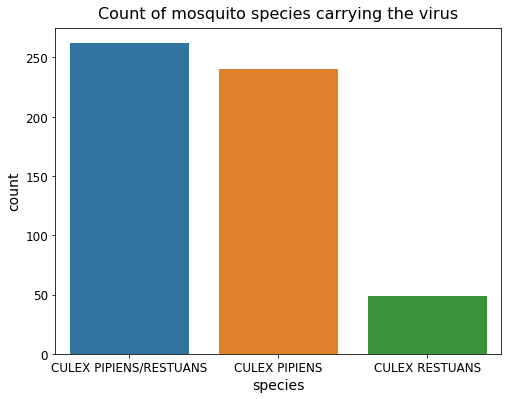

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(df_train_new[df_train_new['wnvpresent']==1]['species'])
plt.title('Count of mosquito species carrying the virus', fontsize=16, y=1.01)
plt.tick_params(labelsize=12)
plt.xlabel('species', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

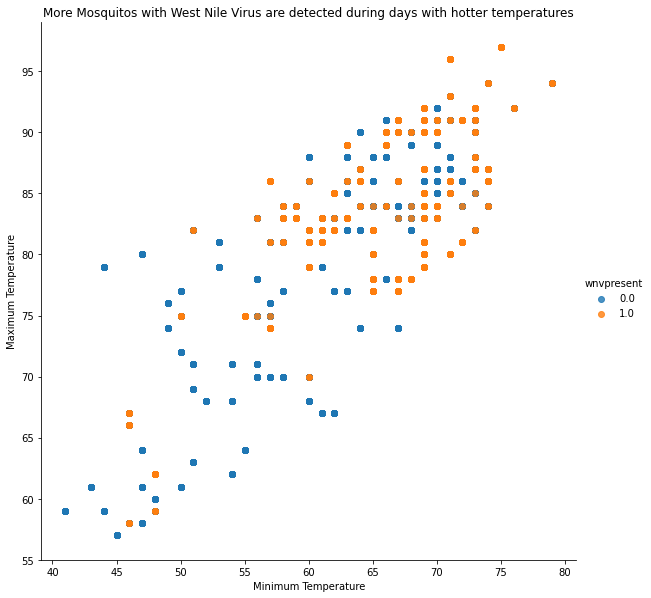

In [38]:
sns.lmplot( x='tmin', y='tmax', data=merged_df, fit_reg=False, hue='wnvpresent', height=8)
plt.title('More Mosquitos with West Nile Virus are detected during days with hotter temperatures')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature');

In [39]:
df_train_test['species'] = df_train_test['species'].map({'CULEX PIPIENS/RESTUANS': 3, 'CULEX PIPIENS': 2, 'CULEX RESTUANS': 1}) \
                                   .fillna(0)

In [40]:
df_weather_new = merged_df.iloc[:len(df_weather) :]

In [41]:
df_test_new = df_train_test.iloc[:len(df_test), :]

In [42]:
df_merged_new = pd.concat([df_train_new, df_weather_new], axis=0)

In [43]:
X = df_train_new[[col for col in df_train_new.columns if 'wnvpresent' not in col]]._get_numeric_data()
y = df_test_new['wnvpresent']

In [44]:
# Generates the full polynomial feature table
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_poly = poly.fit_transform(X)
X_poly.shape

(10506, 35)

In [45]:
# Adds appropriate feature names to all polynomial features
X_poly = pd.DataFrame(X_poly,columns=poly.get_feature_names(X.columns))

# Generates list of poly feature correlations
X_poly_corrs = X_poly.corrwith(y)

# Shows features most highly correlated (positively) with target
X_poly_corrs.sort_values(ascending=False).head(10)

nummosquitos week         0.217510
nummosquitos month        0.216578
nummosquitos dayofweek    0.197737
latitude nummosquitos     0.197188
nummosquitos year         0.196951
nummosquitos              0.196820
nummosquitos^2            0.164020
latitude week             0.104912
year week                 0.104784
week                      0.104171
dtype: float64

In [46]:
cm = abs(df_merged_new.corr()['wnvpresent']).sort_values(ascending=False)
print(cm)

wnvpresent      1.000000
nummosquitos    0.188158
week            0.115678
month           0.107273
tmax            0.076464
year            0.074043
tmin            0.068668
longitude       0.054682
dewpoint        0.035769
dayofweek       0.024539
latitude        0.019042
station         0.000279
Name: wnvpresent, dtype: float64
